<img src="https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/02_Analisis_Estadistico/images/logos/ColorLogo.png">

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jhermosillo/DIPLOMADO_CDP/blob/master/02_Analisis_Estadistico/notebook/4_MonteCarlo.ipynb)

<a id="contenido"></a>
<h1><center>Contenido | Módulo 2</center><h1>
    
---
* [Introducción a los métodos de Monte Carlo con Python](#a)   

<a id="a"></a>
<h1><center>2.10. Introducción - Monte Carlo</center></h1>

[Regreso a contenido](#contenido)

---
![alt text](https://thumbs.gfycat.com/PeriodicTangibleBushbaby-size_restricted.gif)


![alt text](https://steemitimages.com/p/2bP4pJr4wVimqCWjYimXJe2cnCgn5DUA6MvX91E58ut?format=match&mode=fit&width=640)


Los Métodos de Monte-Carlo son técnicas para analizar fenómenos por medio de algoritmos computacionales, que utilizan y dependen fundamentalmente de la generación de números aleatorios.

---

El término Monte-Carlo, hace referencia al casino de Montecarlo, una de las capitales de los juegos de azar; y se utilizó como denominación para estás técnicas por la aleatoriedad inherente que poseen. 


El estudio de los Métodos de Monte-Carlo requiere un conocimiento detallado en una amplia gama de campos; por ejemplo, la probabilidad para describir los experimentos y procesos aleatorios, la estadística para analizar los datos, las ciencias de la computación para implementar eficientemente los algoritmos y la programación matemática para formular y resolver problemas de optimización.

---

Como los Métodos de Monte-Carlo dependen en gran medida de la posibilidad de producir, con una computadora, un flujo infinito de variables aleatorias para todo tipo de distribuciones; no podemos hablar de los Métodos de Monte-Carlo, sin antes explicar los números aleatorios y como podemos generarlos con la ayuda de una computadora.


## Números aleatorios en Python
---
En Python el módulo random nos proporciona un rápido generador de números pseudoaleatorios basado en el **algoritmo Mersenne Twister**; el cual genera números con una distribución casi uniforme y un período grande, haciéndolo adecuado para una amplia gama de aplicaciones. Veamos un pequeño ejemplo.

In [2]:
# Utilizando random para genera números aleatorios.
import random

random.seed(1984) # semilla para replicar la aleatoriedad
random.random() # primer llamado a random

0.36352835585530807

# Monte-Carlo en acción
---
Estos métodos se basan en la analogía entre probabilidad y volumen. Las matemáticas de las medidas formalizan la noción intuitiva de probabilidad, asociando un evento con un conjunto de resultados y definiendo que la probabilidad del evento será el volumen o medida relativa del universo de posibles resultados.  

---
En esencia podemos decir que consiste en calcular o aproximar ciertas expresiones a través de adivinarlas con la ayuda de dibujar una cantidad normalmente grande de números aleatorios. Veamos como funciona con un ejemplo, calculemos el área de un círculo de radio 1; lo que es lo mismo a decir que aproximemos el valor de $π$.

In [3]:
# importando modulos necesarios
import matplotlib.pyplot as plt 
import numpy as np # importando numpy
import pandas as pd # importando pandas
from scipy import stats

np.random.seed(1984) # para poder replicar el random

%matplotlib inline

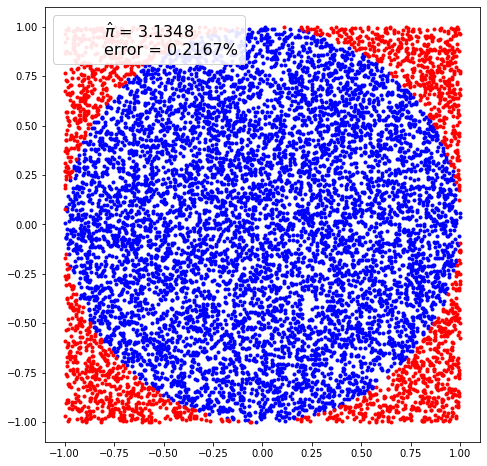

In [4]:
# Ejemplo: Aproximando el valor de pi - área de un círculo de
# radio = 1.

def mc_pi_aprox(N=10000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 1, size=(2, N))
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.4f}\nerror = {:4.4f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

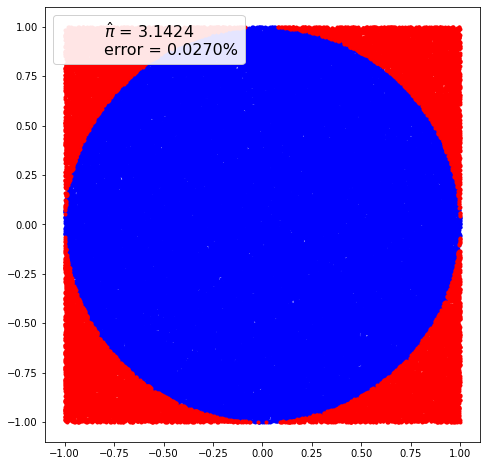

In [5]:
# con 1000000 experimentos
mc_pi_aprox(N=100000)

# El algoritmo Metropolis-Hastings
---
Uno de los métodos MCMC más populares es el algoritmo Metropolis-Hastings; de hecho la mayoría de los algoritmos de MCMC pueden ser interpretados como casos especiales de este algoritmo. 

El algoritmo Metropolis-Hastings esta catalogado como uno de los 10 algoritmos más importantes y más utilizados en ciencia e ingeniería en los últimos veinte años.Se encuentra en el corazón de la mayoría de los métodos de muestreo [MCMC](https://towardsdatascience.com/a-zero-math-introduction-to-markov-chain-monte-carlo-methods-dcba889e0c50). 

In [6]:
# Ejemplo algoritmo metropolis
def metropolis(func, steps=10000):
    """A very simple Metropolis implementation"""
    muestras = np.zeros(steps)
    old_x = func.mean()
    old_prob = func.pdf(old_x)
    
    for i in range(steps):
        new_x = old_x + np.random.normal(0, 0.5)
        new_prob = func.pdf(new_x)
        aceptacion = new_prob / old_prob
        if aceptacion >= np.random.random():
            muestras[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            muestras[i] = old_x
    
    return muestras

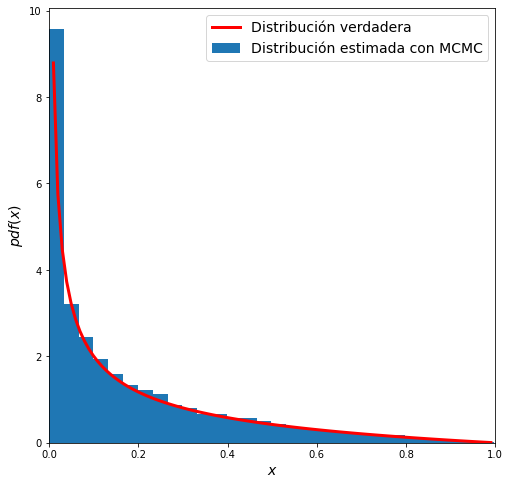

In [7]:
# distribución beta
func = stats.beta(0.4, 2)
samples = metropolis(func=func, steps=100000)
x = np.linspace(0.01, .99, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(0, 1)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30, density=True, label='Distribución estimada con MCMC')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

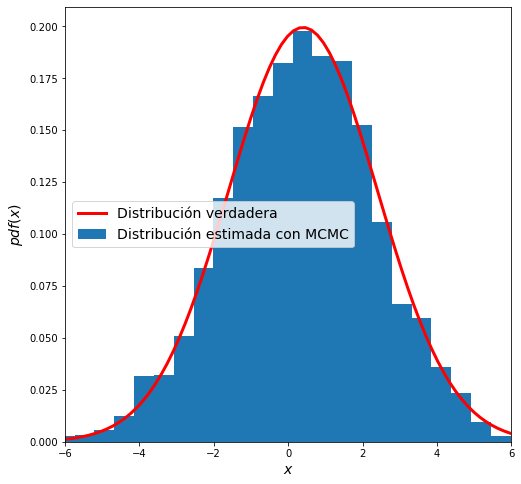

In [8]:
# distribución normal
func = stats.norm(0.4, 2)
samples = metropolis(func=func)
x = np.linspace(-6, 10, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(-6, 6)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30, density=True, label='Distribución estimada con MCMC')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

como vemos, las distribuciones estimadas utilizando MCMC se acercan bastante a las distribuciones reales.